In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import linear_model as lm

## Authors: Wenbo Fu (679744457), Bingyan Liu(668046518)

# Part I Generate Data

First generate the 20 centers from two-dimensional normal. You can use any mean and covariance structure.  You should not regenerate the centers. Use these 20 centers throughout this simulation study.

Given the 20 centers, generate a training sample of size 200 (100 from each class) and a test sample of size 10,000 (5,000 from each class).

Produce a scatter plot of the training data:

assign different colors to the two classes of data points;
overlay the 20 centers on this scatter plot, using a distinguishing marker (e.g., a star or a different shape) and color them according to their respective class.

Generate the 20 centers, 10 for each group

In [2]:
np.random.seed(4457)

csize = 10      
p = 2      
s = 1;      # sd for generating the centers within each class                    
m1 = np.random.normal(size = (csize, p)) * s \
     + np.concatenate([np.array([[1, 0]] * csize)])
m0 = np.random.normal(size = (csize, p)) * s \
     + np.concatenate([np.array([[0, 1]] * csize)])

Generate training data

In [3]:
n_train = 100

# Randomly allocate the n samples for class 1  to the 10 clusters
id1 = np.random.randint(csize, size = n_train)
id0 = np.random.randint(csize, size = n_train)

# sd for generating data  
s = np.sqrt(float(1)/5) 

train_x = np.random.normal(size = (2 * n_train, p)) * s \
            + np.concatenate([m1[id1,:], m0[id0,:]])
train_y = np.concatenate(([1]*n_train, [0]*n_train))

Generate test data

In [4]:
n_test = 5000

# Randomly allocate the n samples for class 1  to the 10 clusters
id1 = np.random.randint(csize, size = n_test)
id0 = np.random.randint(csize, size = n_test)

# sd for generating data  
s = np.sqrt(float(1)/5) 

test_x = np.random.normal(size = (2 * n_test, p)) * s \
            + np.concatenate([m1[id1,:], m0[id0,:]])
test_y = np.concatenate(([1]*n_test, [0]*n_test))

Visualization

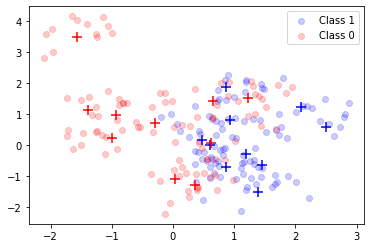

In [5]:
plt.scatter(train_x[:n_train, 0], train_x[:n_train, 1], c = "blue", alpha=0.2, label='Class 1')
plt.scatter(train_x[n_train:, 0], train_x[n_train:, 1], c = "red", alpha=0.2, label='Class 0')

plt.scatter(m1[:,0], m1[:,1], marker = '+', s = 100, c = "blue")
plt.scatter(m0[:,0], m0[:,1], marker = '+', s = 100, c = "red")

plt.legend()
plt.show()

# Part II: kNN

Implement kNN from scratch; use Euclidean Distance. Your implementation should meet the following requirements:

Input: Your kNN function should accept three input parameters: training data, test data, and k. No need to write your kNN function to handle any general input; it suffices to write a function that is able to handle the data for this specific simulation study: binary classification; features are two-dimensional numerical vectors.
Output: Your function should return a vector of predictions for the test data.
Vectorization: Efficiently compute distances between all test points and training points simultaneously. Make predictions for all test points in a single operation.
No Loops: Do not use explicit loops like for or while inside your kNN function to compute distances or make predictions. Instead, harness the power of vectorized operations for efficient computations. For example, you can use broadcasting in Numpy or command outer in R.
Explain how you handle distance ties and voting ties;

distance ties may occur when you have multiple (training) observations that are equidistant from a test observation.
voting ties may occur when K is an even number and you have 50% of the k-nearest-neighbors from each of the two classes.
Test your code with the training/test data you just generated when K = 1, 3, 5; and compare your results with knn in R or sklearn.neighbors in Python.

Report your results (on the test data) as a 2-by-2 table (confusion matrix) for each K value.
Report the results from knn or sklearn.neighbors as a 2-by-2 table (confusion matrix) for each K value.

Define myknn:
If distance ties, it will return based the original sample order, but this won't appear as the locations are random;
If votes ties, it will always return 0 class

In [6]:
class myknn:
    def __init__(self, train_x, train_y, test_x, k):
        #train_x.shape = (n, p)
        #train_y.shape = (n, 1)
        #test_x.shape = (m, p)
        self.train_x = train_x
        n = train_y.shape[0]
        self.train_y = train_y.reshape(n,1)
        self.test_x = test_x
        self.k = k
    
    def fit(self):
        (n,p) = train_x.shape
        (m,p) = test_x.shape
        u = np.sum(self.train_x**2,axis=1)
        v = np.sum(self.test_x**2,axis=1)
        A = np.tile(u,(m,1)).T
        B = np.tile(v,(n,1))
        C= np.dot(self.train_x,self.test_x.T)
        # self.distance matrix shape (n,m)
        self.distance = A + B -2*C 
        Y_label = np.tile(self.train_y,(1,m))
        # sort the distance
        sorted_indices = np.argsort(self.distance,axis = 0)
        new_Y_label = np.take_along_axis(Y_label,sorted_indices,axis = 0)
        most_common_values = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=new_Y_label[:k,:])
        
        return most_common_values    

Compare with the sklearn buildin knn function in the case k = 1/3/5

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [8]:
k = 1
knn = myknn(train_x,train_y,test_x,k)
prediction = knn.fit()
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(train_x, train_y)
prediction_sklearn = neigh.predict(test_x)
cm = confusion_matrix(test_y, prediction)
cm_sklearn = confusion_matrix(test_y, prediction_sklearn)
print(cm)
print(cm_sklearn)

[[3744 1256]
 [1148 3852]]
[[3744 1256]
 [1148 3852]]


In [9]:
k = 3
knn = myknn(train_x,train_y,test_x,k)
prediction = knn.fit()
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(train_x, train_y)
prediction_sklearn = neigh.predict(test_x)
cm = confusion_matrix(test_y, prediction)
cm_sklearn = confusion_matrix(test_y, prediction_sklearn)
print(cm)
print(cm_sklearn)

[[3700 1300]
 [ 952 4048]]
[[3700 1300]
 [ 952 4048]]


In [10]:
k = 5
knn = myknn(train_x,train_y,test_x,k)
prediction = knn.fit()
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(train_x, train_y)
prediction_sklearn = neigh.predict(test_x)
cm = confusion_matrix(test_y, prediction)
cm_sklearn = confusion_matrix(test_y, prediction_sklearn)
print(cm)
print(cm_sklearn)

[[3767 1233]
 [ 908 4092]]
[[3767 1233]
 [ 908 4092]]


# Part III: cvkNN

Implement KNN classification with K chosen by 10-fold cross-validation from scratch.

Set the candidate K values from 1 to 180.
From now on, you are allowed to use the built-in kNN function from R or Python instead of your own implementation from Part 2.
It is possible that multiple K values give the (same) smallest CV error; when this happens, pick the largest K value among them, since the larger the K value, the simpler the model.
Test your code with the training/test data you just generated. Report your results (on the test data) as a 2-by-2 table and also report the value of the selected K.

In [11]:
myk = range(1,181)
num_folds = 10
n = len(train_y)
m = len(myk)
cverr = np.zeros(m)

indices = np.arange(n)
np.random.shuffle(indices)
index_sets = np.array_split(indices, num_folds)

for ifold in range(num_folds):
    train_indices =  np.delete(index_sets, obj=ifold, axis=0).ravel()
    _traindata = train_x[train_indices]
    _Ytrain = train_y[train_indices]
    
    test_indices = index_sets[ifold]
    _testdata = train_x[test_indices]
    _Ytest = train_y[test_indices]
   
    for j in range(m):
        K = myk[j]
        knn_model = KNeighborsClassifier(K)
        knn_model.fit(_traindata, _Ytrain)
        predict_Y = knn_model.predict(_testdata)
        cverr[j] += sum(predict_Y != _Ytest)
    
cverr /= float(n)
cverr

array([0.25 , 0.245, 0.255, 0.305, 0.255, 0.255, 0.245, 0.265, 0.245,
       0.225, 0.225, 0.235, 0.24 , 0.225, 0.225, 0.235, 0.25 , 0.23 ,
       0.235, 0.24 , 0.24 , 0.26 , 0.25 , 0.26 , 0.235, 0.24 , 0.23 ,
       0.23 , 0.245, 0.25 , 0.255, 0.245, 0.25 , 0.25 , 0.24 , 0.245,
       0.245, 0.24 , 0.265, 0.245, 0.265, 0.275, 0.28 , 0.28 , 0.27 ,
       0.27 , 0.265, 0.265, 0.275, 0.275, 0.275, 0.275, 0.28 , 0.275,
       0.28 , 0.28 , 0.28 , 0.28 , 0.28 , 0.28 , 0.28 , 0.28 , 0.28 ,
       0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.27 , 0.275, 0.27 ,
       0.275, 0.275, 0.275, 0.28 , 0.28 , 0.28 , 0.28 , 0.28 , 0.285,
       0.275, 0.285, 0.285, 0.285, 0.28 , 0.28 , 0.28 , 0.28 , 0.285,
       0.28 , 0.27 , 0.275, 0.275, 0.28 , 0.28 , 0.285, 0.275, 0.27 ,
       0.275, 0.275, 0.28 , 0.275, 0.28 , 0.275, 0.275, 0.28 , 0.275,
       0.275, 0.27 , 0.27 , 0.27 , 0.27 , 0.265, 0.27 , 0.27 , 0.27 ,
       0.26 , 0.275, 0.28 , 0.285, 0.28 , 0.28 , 0.28 , 0.29 , 0.285,
       0.29 , 0.285,

In [12]:
k_selected = np.argmin(cverr)+1
neigh = KNeighborsClassifier(n_neighbors=k_selected)
neigh.fit(train_x, train_y)
prediction_sklearn = neigh.predict(test_x)
cm_selected = confusion_matrix(test_y, prediction_sklearn)
print(cm_selected)

[[3883 1117]
 [ 951 4049]]


# Part IV: Bayes Rule

Implement the Bayes rule. Your implementation should meet the following requirements:
Do not use explicit loops over the test sample size (10,000 or 5,000).
You are allowed to use loops over the number of centers (10 or 20), although you can avoid all loops.
Test your code with the test data you just generated. (Note that you do not need training data for the Bayes rule.) Report your results (on the test data) as a 2-by-2 table.

In [13]:
m0_reshaped = m0[:,np.newaxis,:]
m1_reshaped = m1[:,np.newaxis,:]
test_x_reshaped = test_x[np.newaxis,:,:]

In [14]:
Bayes_pred = np.where(np.sum(np.exp(-np.sum((m1_reshaped - test_x_reshaped)**2/(2*s**2), axis=2)),axis=0)\
         /np.sum(np.exp(-np.sum((m0_reshaped - test_x_reshaped)**2/(2*s**2), axis=2)),axis=0) > 1,1,0)

In [15]:
cm_Bayes = confusion_matrix(test_y, Bayes_pred)
print(cm_Bayes)

[[3883 1117]
 [ 741 4259]]


# Part V: Simulation Study

Given the 20 centers generated in Part 1, repeatedly generate 50 training/test datasets (training size = 200 and test size = 10,000). For each pair of training/test datasets, calculate the test errors (the averaged 0/1 loss on the test data set) for each of the following three procedures:

kNN with K = 7 (you can use the built-in kNN function from R or Python);
kNN with K chosen by 10-fold CV (your implementation from Part 3); and
the Bayes rule (your implementation from Part 4).
Present the test errors graphically, e.g., using a boxplot or strip chart (see below). Also, report the (min, max, median, 25% quantile, 75% quantile) for the 50 selected K values.

In [16]:
#select_best_k is a function to find bese k from 10-fold cv knn
def select_best_k(train_x,train_y):
    myk = range(1,181)
    num_folds = 10
    n = len(train_y)
    m = len(myk)
    cverr = np.zeros(m)

    indices = np.arange(n)
    np.random.shuffle(indices)
    index_sets = np.array_split(indices, num_folds)

    for ifold in range(num_folds):
        train_indices =  np.delete(index_sets, obj=ifold, axis=0).ravel()
        _traindata = train_x[train_indices]
        _Ytrain = train_y[train_indices]

        test_indices = index_sets[ifold]
        _testdata = train_x[test_indices]
        _Ytest = train_y[test_indices]

        for j in range(m):
            K = myk[j]
            knn_model = KNeighborsClassifier(K)
            knn_model.fit(_traindata, _Ytrain)
            predict_Y = knn_model.predict(_testdata)
            cverr[j] += sum(predict_Y != _Ytest)

    cverr /= float(n)
    return myk[np.argmin(cverr)]

In [17]:
import time

itr = 50
knn_7_error = []
knn_selected = []
knn_selected_error = []
bayes_error = []

start_time = time.time()
for it in range(itr):
    # create training data
    id1 = np.random.randint(csize, size = n_train)
    id0 = np.random.randint(csize, size = n_train)
    s = np.sqrt(float(1)/5) 
    train_x = np.random.normal(size = (2 * n_train, p)) * s \
                + np.concatenate([m1[id1,:], m0[id0,:]])
    train_y = np.concatenate(([1]*n_train, [0]*n_train))
    
    # creat test data
    id1 = np.random.randint(csize, size = n_test)
    id0 = np.random.randint(csize, size = n_test)
    s = np.sqrt(float(1)/5) 
    test_x = np.random.normal(size = (2 * n_test, p)) * s \
                + np.concatenate([m1[id1,:], m0[id0,:]])
    test_y = np.concatenate(([1]*n_test, [0]*n_test))
    
    # model performance for k = 7 knn
    knn_7_model = KNeighborsClassifier(7)
    knn_7_model.fit(train_x, train_y)
    predict_Y_7 = knn_7_model.predict(test_x)
    error = sum(predict_Y_7 != test_y)/float(10000)
    knn_7_error.append(error)
    
    # model performance for k = k_best knn
    k_selected = select_best_k(train_x,train_y)
    knn_selected.append(k_selected)
    knn_selected_model = KNeighborsClassifier(k_selected)
    knn_selected_model.fit(train_x, train_y)
    predict_Y_selected = knn_selected_model.predict(test_x)
    error = sum(predict_Y_selected != test_y)/float(10000)
    knn_selected_error.append(error)
    
    # model performance for bayes
    test_x_reshaped = test_x[np.newaxis,:,:]
    bayes_Y_pred = np.where(np.sum(np.exp(-np.sum((m1_reshaped - test_x_reshaped)**2/(2*s**2), axis=2)),axis=0)\
         /np.sum(np.exp(-np.sum((m0_reshaped - test_x_reshaped)**2/(2*s**2), axis=2)),axis=0) > 1,1,0)    
    error = sum(bayes_Y_pred != test_y)/float(10000)
    bayes_error.append(error)
    if it%5 == 0:
        print(f"finish evluation iteration {it}")
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")

finish evluation iteration 0
finish evluation iteration 5
finish evluation iteration 10
finish evluation iteration 15
finish evluation iteration 20
finish evluation iteration 25
finish evluation iteration 30
finish evluation iteration 35
finish evluation iteration 40
finish evluation iteration 45
Elapsed time: 55.620398 seconds


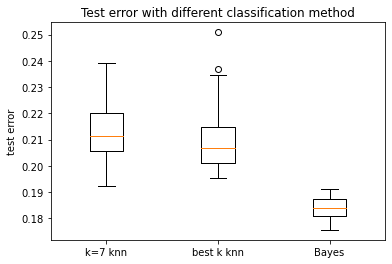

In [18]:
plt.boxplot([knn_7_error, knn_selected_error, bayes_error])
plt.xticks([1, 2, 3], ['k=7 knn', 'best k knn', 'Bayes'])
plt.ylabel('test error')
plt.title('Test error with different classification method')
plt.show()

In [19]:
minimum = np.min(knn_selected)
maximum = np.max(knn_selected)
median = np.median(knn_selected)
q1 = np.percentile(knn_selected, 25)
q3 = np.percentile(knn_selected, 75)

print('best k values statistics')
print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")
print(f"Median: {median}")
print(f"25th Percentile (Q1): {q1}")
print(f"75th Percentile (Q3): {q3}")

best k values statistics
Minimum: 1
Maximum: 46
Median: 17.0
25th Percentile (Q1): 7.5
75th Percentile (Q3): 23.0
